1.15.0


In [3]:
!pip install --upgrade tensorflow

     |████████████████████████████████| 86.3MB 71kB/s 
     |████████████████████████████████| 3.8MB 36.9MB/s 
     |████████████████████████████████| 450kB 58.1MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data=load_breast_cancer()

In [7]:
type(data)
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
data.data.shape

(569, 30)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.target.shape

(569,)

In [12]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape


In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 1s 1ms/sample - loss: 0.6206 - accuracy: 0.6798 - val_loss: 0.5584 - val_accuracy: 0.7128
Epoch 2/100
381/381 [==============================] - 0s 95us/sample - loss: 0.5607 - accuracy: 0.7349 - val_loss: 0.4995 - val_accuracy: 0.7713
Epoch 3/100
381/381 [==============================] - 0s 91us/sample - loss: 0.5102 - accuracy: 0.7848 - val_loss: 0.4515 - val_accuracy: 0.8404
Epoch 4/100
381/381 [==============================] - 0s 90us/sample - loss: 0.4683 - accuracy: 0.8189 - val_loss: 0.4125 - val_accuracy: 0.8564
Epoch 5/100
381/381 [==============================] - 0s 100us/sample - loss: 0.4327 - accuracy: 0.8373 - val_loss: 0.3814 - val_accuracy: 0.8777
Epoch 6/100
381/381 [==============================] - 0s 106us/sample - loss: 0.4039 - accuracy: 0.8635 - val_loss: 0.3553 - val_accuracy: 0.8830
Epoch 7/100
381/381 [==============================] - 0s 103us/sample - loss

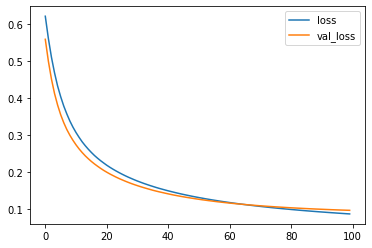

In [21]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

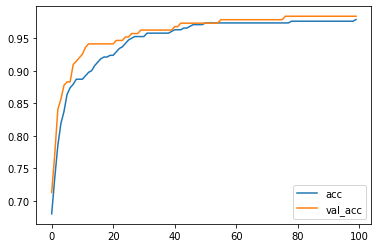

In [22]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [23]:
P = model.predict(X_test)
print(P)


import numpy as np
P = np.round(P).flatten()
print(P)

[[8.00356269e-03]
 [4.27401662e-02]
 [9.82153296e-01]
 [9.91669297e-02]
 [3.41653824e-04]
 [6.14583492e-04]
 [9.82455015e-01]
 [3.24511051e-01]
 [3.47130001e-02]
 [3.27383280e-02]
 [9.56404209e-01]
 [9.99837160e-01]
 [9.53842521e-01]
 [9.85821605e-01]
 [9.85575795e-01]
 [9.89805460e-01]
 [8.50828767e-01]
 [9.79010344e-01]
 [2.87556231e-01]
 [9.75896239e-01]
 [8.91616106e-01]
 [1.36283904e-01]
 [9.24130201e-01]
 [9.96997595e-01]
 [1.04695559e-02]
 [9.76073325e-01]
 [8.50659609e-03]
 [1.38291717e-02]
 [9.71150696e-01]
 [9.83214498e-01]
 [7.50807524e-01]
 [9.99364853e-01]
 [7.81020522e-03]
 [9.83514190e-01]
 [9.97085094e-01]
 [9.69250560e-01]
 [7.43180513e-04]
 [6.91645563e-01]
 [9.85696197e-01]
 [9.10808682e-01]
 [9.98381019e-01]
 [2.33650208e-05]
 [9.51908469e-01]
 [9.69426274e-01]
 [5.39959908e-01]
 [9.99917746e-01]
 [5.47710061e-03]
 [9.99809980e-01]
 [8.27128530e-01]
 [7.15255737e-07]
 [5.25861979e-04]
 [9.85064089e-01]
 [9.67696190e-01]
 [9.84232545e-01]
 [6.83895350e-02]
 [9.927469

In [24]:
print("Manually calculated accuracy:", np.mean(P == y_test))

Manually calculated accuracy: 0.9840425531914894
